## Gower distance for ordinal categorical variables

$$M_{ij} = \dfrac{\sum_{k = 1}^N w_{ijk}h_{ik} - w_{ijk}^2}{\sum_{k = 1}^N
			w_{ijk}}$$

4 variáveis com todas as posibilidades

In [47]:
import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [48]:
variables = list(itertools.product([1, 2, 3, 4], repeat=4))

In [49]:
def weight(categories, max_categories_ranks = [4, 4, 4, 4]):
    return list(map(lambda x: x[0]/x[1], zip(categories, max_categories_ranks)))
         
companies_weights = list(map(
    lambda x: { "company": x, "weights": weight(x), "candidates_merits": [] },
    variables
))

In [50]:
merits = []
for company in companies_weights:
    for candidate in companies_weights:
        candidate_weights = candidate['weights']
        numerator = 0
        for company_weight, candidate_weight in zip(company['weights'], candidate['weights']):
            numerator += (company_weight*candidate_weight) - (company_weight**2)
        company["candidates_merits"].append(numerator / sum(company['weights']))

In [43]:
def merit(candidate=(), company=()):
    result = 0
    for can, com in zip(candidate, company):
        result += (can/4)*(com/4) - (com/4)**2
    return result / (sum(company) / 4)

In [46]:
merit(candidate=(3, 4, 4, 4), company=(4, 4, 2, 2))

0.1111111111111111

## Raw merits - colorful

In [51]:
merits = np.array(list(map(lambda x: x["candidates_merits"], companies_weights)))

## Binary merits

In [53]:
merits = np.array(list(map(
    lambda x: list(map(lambda y: 1 if y >= 0 else 0, x["candidates_merits"])),
    companies_weights
)))

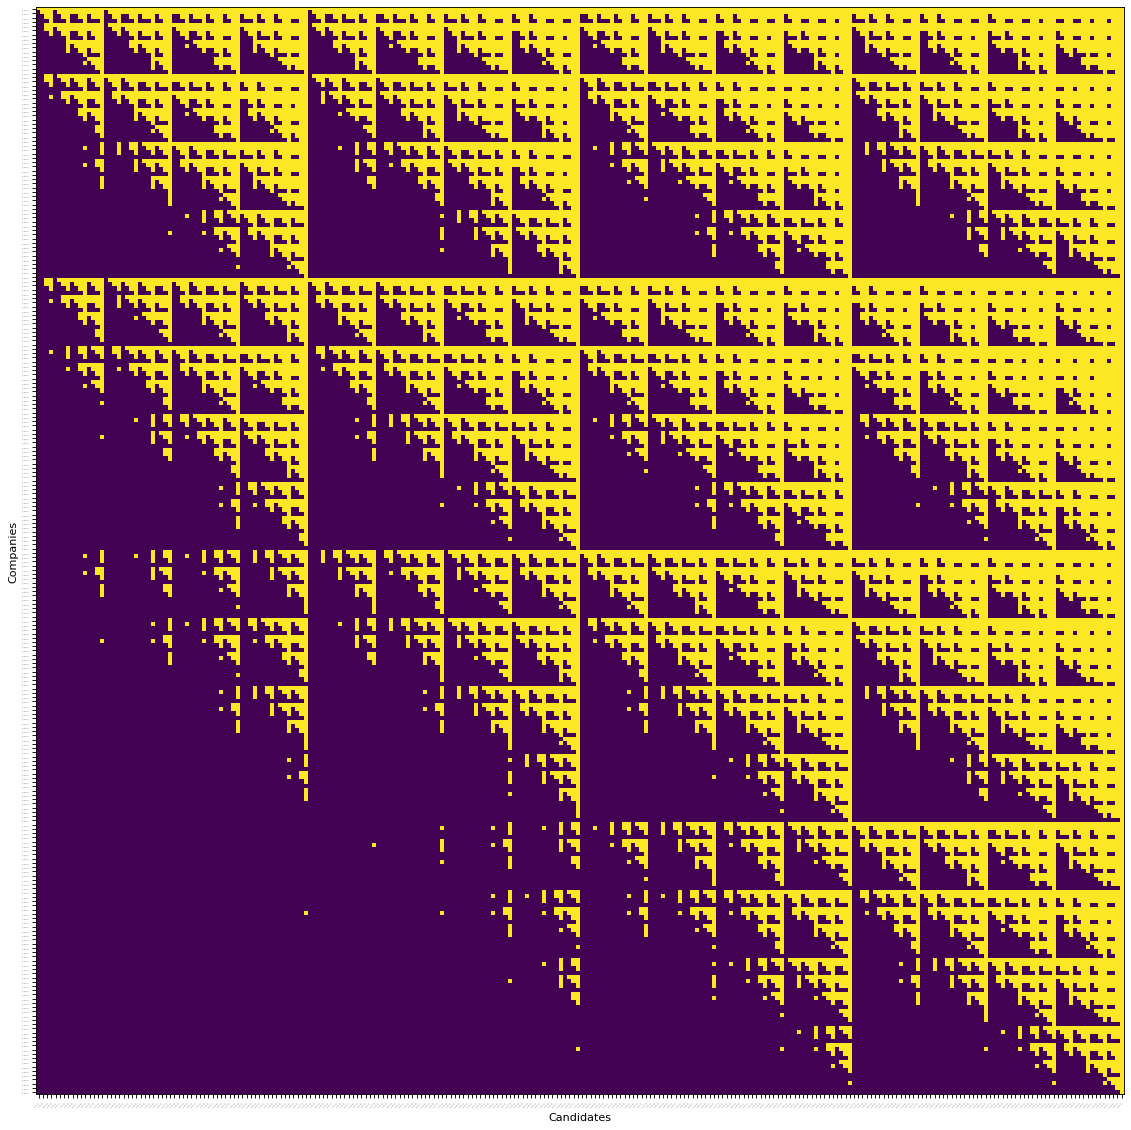

In [54]:
companies = candidates = variables

fig, ax = plt.subplots(figsize=(24, 18), dpi=80)
im = ax.imshow(merits)

ax.set_xlabel('Candidates')
ax.set_ylabel('Companies')

ax.set_xticks(np.arange(len(candidates)))
ax.set_yticks(np.arange(len(companies)))

ax.set_xticklabels(candidates, fontsize=1)
ax.set_yticklabels(companies, fontsize=1)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Causes error to open SVG
#for i in range(len(companies)):
#    for j in range(len(candidates)):
#        ax.annotate(merits_colorful[i, j], (j, i), fontsize=0.5)

plt.savefig('result-colorful.svg', format='svg', dpi=1200)